In [34]:
import db_logger
import matplotlib.pyplot as plt
import glob, pathlib
import ipywidgets as widgets
%load_ext autoreload
%autoreload 2

%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:

logger =  db_logger.DB_Logger("/mnt/data/arty/data/gan_sampling/baseline.db", connect_only=True)
name2id = {}
for id in logger.get_experiment_ids():
    name = logger.get_experiment_name(id)
    name2id[name] = id
    print(name) 
    # if "rlvl2" in name:
    #     logger.remove_experiment(id)

Connecting to existing database at /mnt/data/arty/data/gan_sampling/baseline.db
BloodMNIST_rlvl1_bTrue_aug_True
BloodMNIST_rlvl1_bFalse_aug_True
PathMNIST_rlvl1_bTrue_aug_True
OrganCMNIST_rlvl1_bTrue_aug_True
PathMNIST_rlvl1_bFalse_aug_True
OrganCMNIST_rlvl1_bFalse_aug_True
BloodMNIST_rlvl2_bTrue_aug_True
BloodMNIST_rlvl2_bFalse_aug_True
PathMNIST_rlvl2_bTrue_aug_True
OrganCMNIST_rlvl2_bTrue_aug_True
PathMNIST_rlvl2_bFalse_aug_True
OrganCMNIST_rlvl2_bFalse_aug_True
BloodMNIST_rlvl3_bTrue_aug_True
BloodMNIST_rlvl3_bFalse_aug_True
PathMNIST_rlvl3_bTrue_aug_True
PathMNIST_rlvl3_bFalse_aug_True
OrganCMNIST_rlvl3_bTrue_aug_True
OrganCMNIST_rlvl3_bFalse_aug_True


In [180]:
results = {}

for exp in logger.get_experiment_ids():
    epochs, means, stds, maxs, samples = logger.get_stats(exp)
    if len(means) == 0:
        continue
    max_mean_idx = means.index(max(means))
    max_mean = means[max_mean_idx]
    at_epoch = epochs[max_mean_idx]
    samples = samples[max_mean_idx]
    name = logger.get_experiment_name(exp)
    results[f"{name:-<20} at: {at_epoch:<3}, samples: {samples:<3}"] = max_mean
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
filterfunc = lambda x: "B" in x[0] #and "__" in x[0]#and "Our+" not in x[0] 
sorted_results = list(filter(filterfunc, sorted_results))
for k, v in sorted_results[:40]:
    print(f"{v:.4f} -> {k}")

0.9309 -> BloodMNIST_rlvl1_bFalse_aug_True at: 543616, samples: 1  
0.9191 -> BloodMNIST_rlvl1_bTrue_aug_True at: 497984, samples: 1  
0.8685 -> BloodMNIST_rlvlNone_bTrue_aug_True at: 178496, samples: 1  
0.8269 -> BloodMNIST_rlvl2_bFalse_aug_True at: 429504, samples: 1  
0.8199 -> BloodMNIST_rlvl3_bTrue_aug_True at: 338240, samples: 1  
0.7873 -> BloodMNIST_rlvl2_bTrue_aug_True at: 497984, samples: 1  
0.7853 -> BloodMNIST_rlvl3_bFalse_aug_True at: 520832, samples: 1  
0.7576 -> BloodMNIST_rlvlNone_bFalse_aug_True at: 10048, samples: 1  


interactive(children=(Dropdown(description='exp1', options=('BloodMNIST_rlvl1_bFalse_aug_True', 'BloodMNIST_rl…

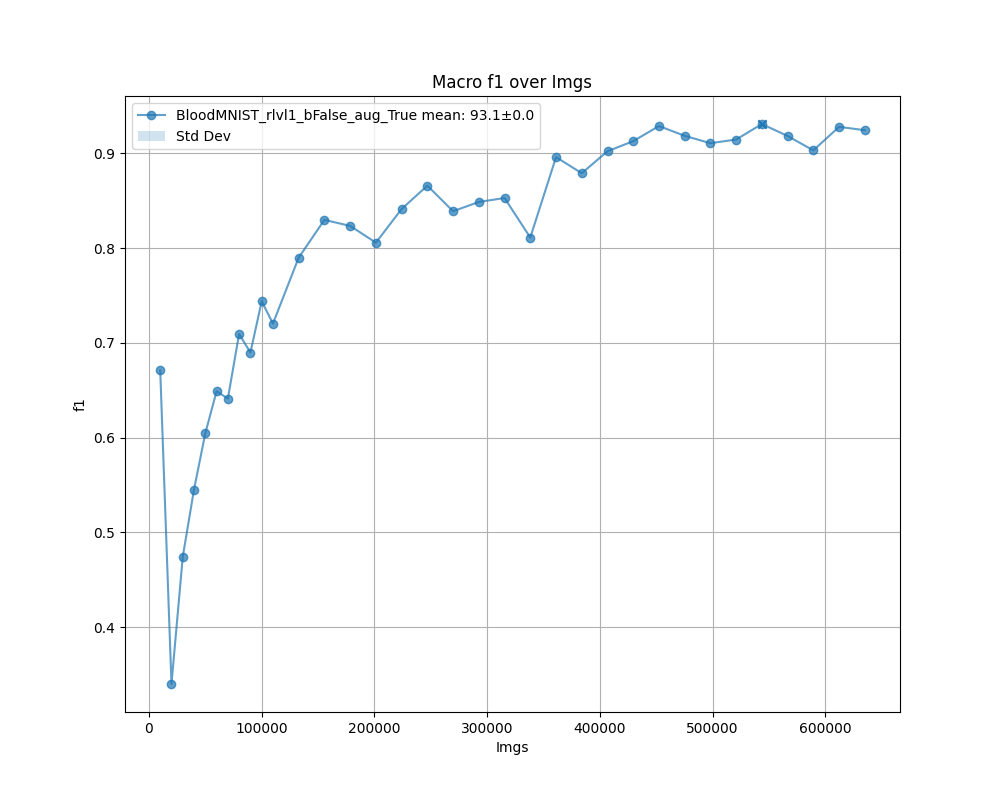

In [182]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
names = sorted([logger.get_experiment_name(x) for x in logger.get_experiment_ids()],)
@widgets.interact(
        exp1=names, 
        exp2=["none"]+names, 
        exp3=["none"]+names,
        exp4=["none"]+names,
        metric=["f1", "acc", "precision", "recall"])
def display_content(exp1, exp2, exp3, exp4, metric):
    name2id = {}
    for id in logger.get_experiment_ids():
        name2id[logger.get_experiment_name(id)] = id
    print(f"Working ...", end="")
    ax.clear()
    db_logger.plot_metric(logger, [name2id[exp1]], metric=metric, ax=ax, prefix='')
    if exp2 != "none":
        db_logger.plot_metric(logger, [name2id[exp2]], metric=metric, ax=ax, prefix='')
    if exp3 != "none":
        db_logger.plot_metric(logger, [name2id[exp3]], metric=metric, ax=ax, prefix='')
    if exp4 != "none":
        db_logger.plot_metric(logger, [name2id[exp4]], metric=metric, ax=ax, prefix='')
    print(f"\rDone       ")